# Исследование интернет-магазина игр

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Цель исследования:**

1. Выявить закономерности, которые определяют успешность игры.
2. Получить необходимые результаты для того, чтобы выбрать потенциально популярный продукт и спланировать рекламные кампании.

**Ход исследования:**

Данные о продажах игр я получу из файла ```'/datasets/games.csv'```. О качестве данных заранее ничего не известно, поэтому перед тем, как приступать к исследованию, понадобится обзор данных.

На этапе ознакомления с данными мне необходимо убедиться в качестве полученных данных. При наличие пропусков в данных я их обработать. Затем, мне необходимо очистить данные от мусора, чтобы можно было провести достоверное исследование.

В самом исследовании я выявлю, какие платформы являются самыми популярными среди пользователей, отследить закономерности, которые влияют на объем продаж игры. Мне необходимо выяснить, какой продукт на данный момент является самым прибыльным при планировании его рекламной кампании. 

Также я составлю портрет пользователя в каждом регионе, выявлю список популярных платформ и игровых жанров. В процессе работы важно проверить, как влияет рейтинг ESRB на продаваемость игр в регионах.

На финальном этапе мне необходимо проверить две гипотезы про пользовательские рейтинги отдельных платформ и жанров. В конце проекта я сформулирую общий вывод по всей проделанной работе и дам рекомендации бизнесу.

Таким образом, моё исследование пройдет в 6 этапов:
- Изучение исходных данных
- Предобработка данных
- Исследовательский анализ данных
- Составление портрета пользователя каждого региона
- Проверка гипотез
- Написание общего вывода


### Изучение общей информации

***1.1 Импорт библиотек + создание датафрейма с данными из файла:***

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import numpy as np
from scipy import stats as st

warnings.filterwarnings('ignore')

In [2]:
try:
    data = pd.read_csv('/datasets/games.csv')
except:
    data = pd.read_csv('games.csv')

***1.2 Изучение полученных данных о продажах игр:***

In [3]:
data.info() # Общая информация о столбцах датафрейма

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
data.head(15) # Вывод первых 15 строк датафрейма

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [5]:
data.describe() # Получение метрик для числовых столбцов

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


***1.3 Построение гистограмм для всех числовых столбцов датафрейма:***

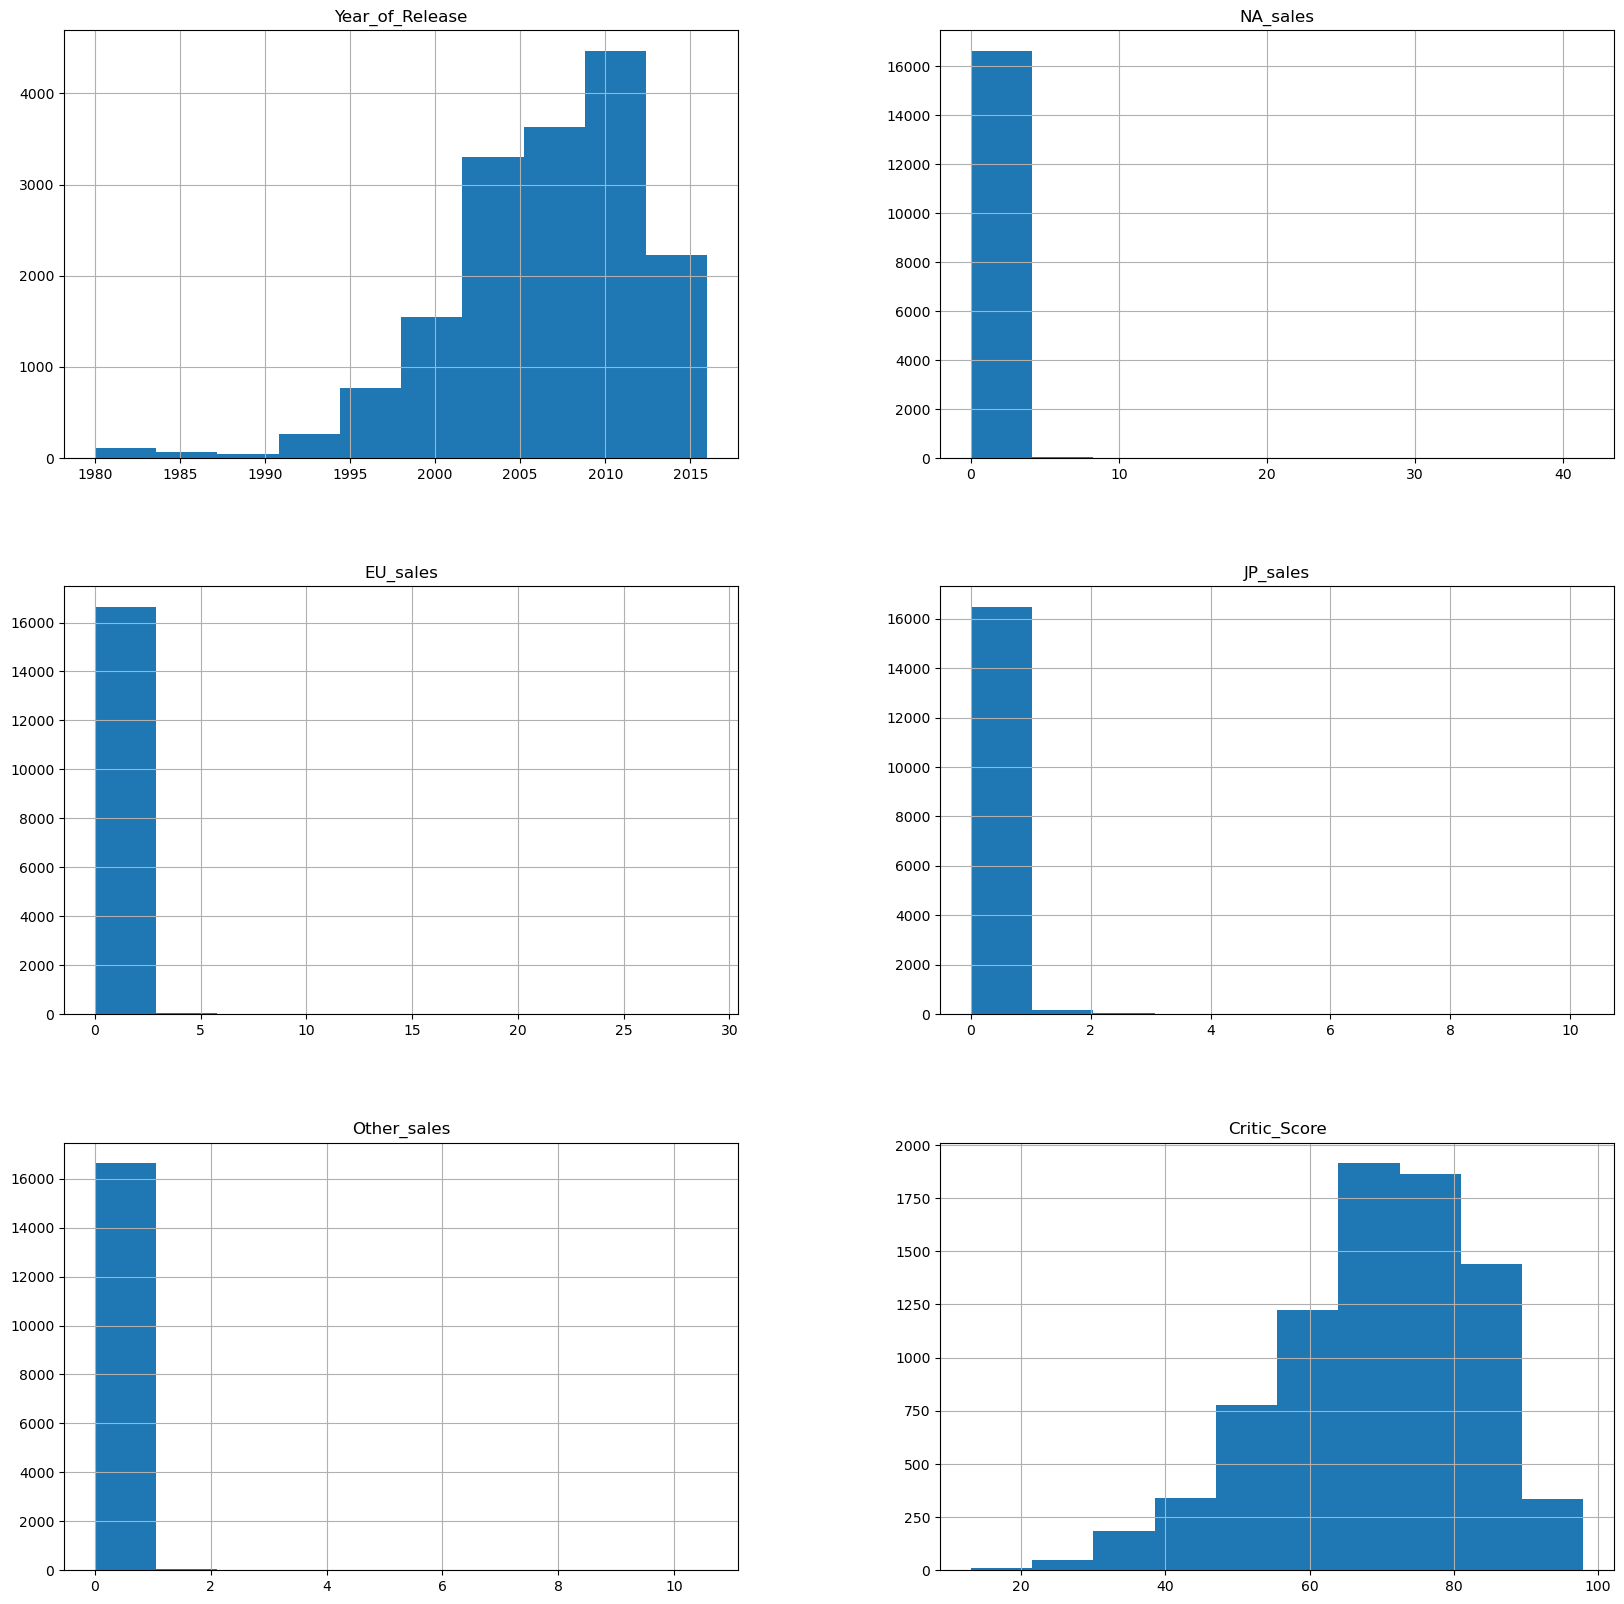

In [6]:
data.hist(figsize=(20, 20)) 
plt.show()

**Вывод:** 

На этапе ознакомления с исходными данными были обнаружены пропуски. В отдельных столбцах имеется некорректный тип данных. Все названия столбцов не соответствуют нижнему регистру. Для того, чтобы провести качественное исследование, необходимо сначала провести предобработку данных, чтобы подготовить их к дальнейшему анализу.

### Предобработка данных

***2.1 Приведение названий столбцов к нижнем регистру:***

In [7]:
data.columns = data.columns.str.lower()

***2.2 Обработка пропусков в данных:***

Для того, чтобы изменить тип данных в столбцах, необходимо сначала обработать пропуски, чтобы не появлялись ошибки.

In [8]:
data.duplicated().sum() # Проверка строк-дубликатов в датафрейме

0

In [9]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

В столбце ```name``` обнаружены два пропуска. Можно их удалить, так как это не повлияет на результат исследования.

In [10]:
data = data.dropna(subset=['name'])

В столбце ```year_of_release``` пропуски можно удалить из датафрейма, потому что оснований для точного заполнения недостаточно.

In [11]:
data = data.dropna(subset=['year_of_release'])

In [12]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

Строки с пропусками в столбцах ```name, genre``` удалены из датафрейма, так как их количество очень мало (<0.01%)

Пропуски в столбце ```year_of_release``` были удалены, так как их количество очень мало.

Пропуски в столбцах ```user_score, critic_score, rating``` следует оставить, так как они составляют 40-50% всех данных.

Причины, по которым могли появиться пропуски в данных:
1. Сбой системы при выгрузке данных в датасет.
2. Данные могли быть искажены за такой долгий период.

Проверим строковое значение tbd (от английского **To Be Determined** (будет определено)) в столбце ```user_score```:

In [13]:
data[data['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010.0,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


In [14]:
data['user_score'] = data['user_score'].replace('tbd', np.NaN)

Можно заменить строковое значение tbd на пропуск, так как оценка еще не была определена, значит это потенциальные пропуски в данных.

***2.3 Изменение типов данных в столбцах датафрейма:***

In [15]:
data.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

Столбец ```year_of_release``` имеет тип данных **float64**, однако год не может быть вещественным числом. Необходимо изменить тип данных на целочисленный (int)

In [16]:
data['year_of_release'] = data['year_of_release'].astype('int')

Заметим, что столбец ```user_score``` имеет тип данных **object**. В этом столбце хранятся оценки пользователей, поэтому необходимо изменить тип данных на вещественный.

In [17]:
data['user_score'] = data['user_score'].astype('float')

***2.4 Добавление столбца с суммарными продажами во всех регионах:***

Для того, чтобы заполнить новый столбец данными, нужно просуммировать продажи для всех регионов (столбцы ```na_sales, eu_sales, jp_sales, other_sales```)

In [18]:
data['sum_sales'] =  data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

# Проверим данные
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31


Чтобы было легче определять платформу в исследовании, необходимо присвоить ей полное название.

In [19]:
data['platform'].unique() # Изначальный список платформ

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [20]:
data['platform'] = data['platform'].replace('Wii', 'Nintendo Wii')
data['platform'] = data['platform'].replace('NES', 'Nintendo NES')
data['platform'] = data['platform'].replace('GB', 'GB-60')
data['platform'] = data['platform'].replace('DS', 'Nintendo DS')
data['platform'] = data['platform'].replace('X360', 'Xbox 360')
data['platform'] = data['platform'].replace('PS3', 'PlayStation 3')
data['platform'] = data['platform'].replace('PS2', 'PlayStation 2')
data['platform'] = data['platform'].replace('SNES', 'Nintendo SNES')
data['platform'] = data['platform'].replace('GBA', 'Game Boy Advance')
data['platform'] = data['platform'].replace('PS4', 'PlayStation 4')
data['platform'] = data['platform'].replace('3DS', 'Nintendo 3DS')
data['platform'] = data['platform'].replace('N64', 'Nintendo 64')
data['platform'] = data['platform'].replace('PS', 'PlayStation')
data['platform'] = data['platform'].replace('XB', 'Xbox')
data['platform'] = data['platform'].replace('2600', 'Atari 2600')
data['platform'] = data['platform'].replace('XOne', 'Xbox One')
data['platform'] = data['platform'].replace('WiiU', 'Nintendo Wii U')
data['platform'] = data['platform'].replace('GC', 'Nintendo GameCube')
data['platform'] = data['platform'].replace('GEN', 'SEGA Retro Genesis')
data['platform'] = data['platform'].replace('DC', 'Dendy Classic')
data['platform'] = data['platform'].replace('PSV', 'PS Vita')
data['platform'] = data['platform'].replace('SAT', 'Sega Saturn')
data['platform'] = data['platform'].replace('SCD', 'Sega CD')
data['platform'] = data['platform'].replace('WS', 'WonderSwan')
data['platform'] = data['platform'].replace('NG', 'N-Gage')
data['platform'] = data['platform'].replace('TG16', 'NEC TurboGrafx')
data['platform'] = data['platform'].replace('3DO', 'Panasonic 3DO')
data['platform'] = data['platform'].replace('GG', 'Game Gear')
data['platform'] = data['platform'].replace('PCFX', 'NEC PC-FX')

In [21]:
data['platform'].unique() # Проверка замены

array(['Nintendo Wii', 'Nintendo NES', 'GB-60', 'Nintendo DS', 'Xbox 360',
       'PlayStation 3', 'PlayStation 2', 'Nintendo SNES',
       'Game Boy Advance', 'PlayStation 4', 'Nintendo 3DS', 'Nintendo 64',
       'PlayStation', 'Xbox', 'PC', 'Atari 2600', 'PSP', 'Xbox One',
       'Nintendo Wii U', 'Nintendo GameCube', 'SEGA Retro Genesis',
       'Dendy Classic', 'PS Vita', 'Sega Saturn', 'Sega CD', 'WonderSwan',
       'N-Gage', 'NEC TurboGrafx', 'Panasonic 3DO', 'Game Gear',
       'NEC PC-FX'], dtype=object)

**Вывод:**

Названия столбцов были приведены к нижнему регистру. В данных были найдены пропуски в данных. Они были обработаны. В столбцах были заменены типы данных.

### Исследовательский анализ данных

#### Статистика выпуска игр в разные годы:

Выведем данные о всех выпущенных играх за каждый год. Для этого сгруппируем данные по году релиза:

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64


<AxesSubplot:title={'center':'Количество выпускаемых игр за каждый год'}, xlabel='year_of_release'>

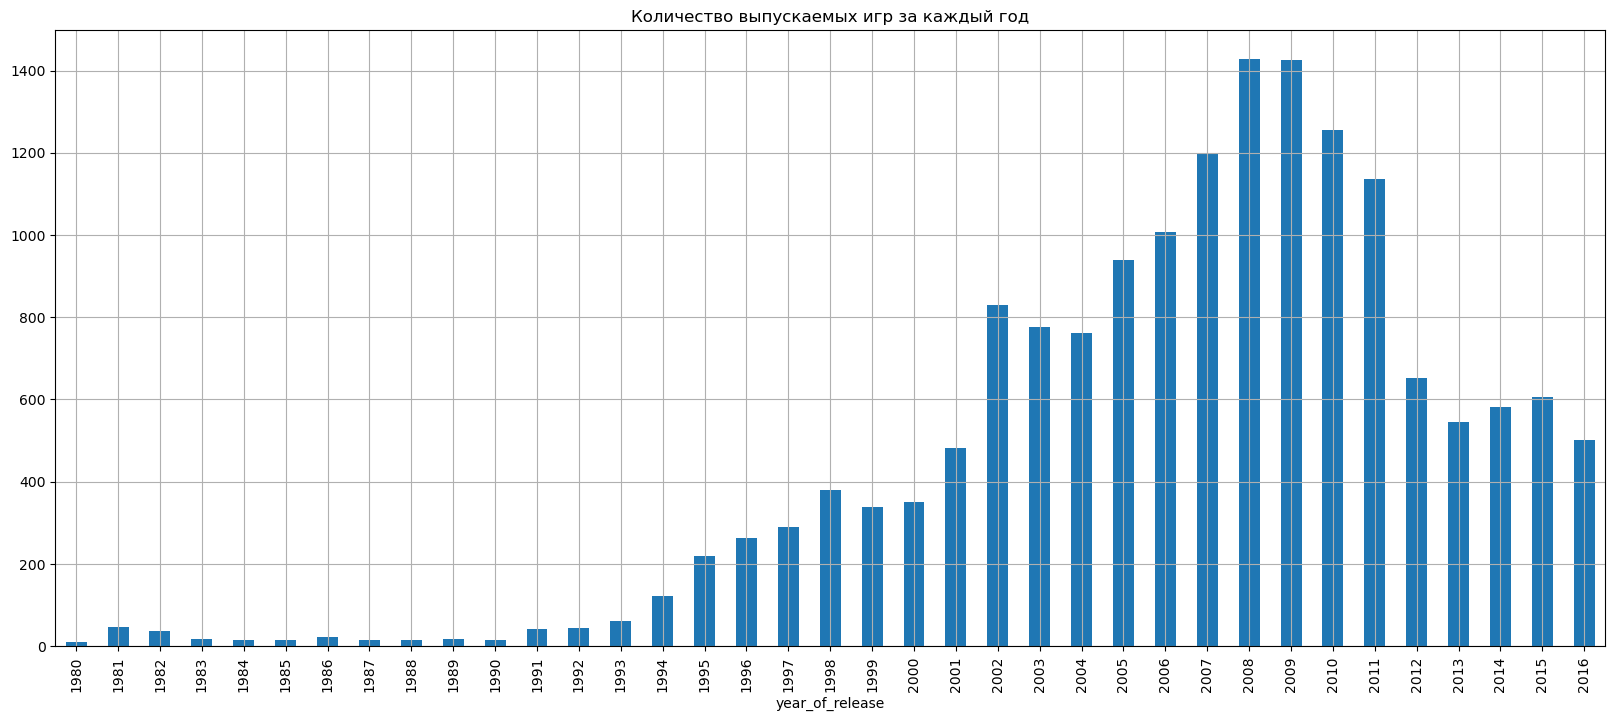

In [22]:
print(data.groupby('year_of_release')['name'].count())
data.groupby('year_of_release')['name'].count().plot(kind='bar', grid=True, figsize=(20, 8), title='Количество выпускаемых игр за каждый год')

Наблюдение:

Можно заметить, что больше всего игр выпускалось с 2008 по 2010, однако анализировать данные по всем годам не имеет смысла, так как игры устаревают, а их заменяют новыми версиями. Рассматривать период с 1980 по 2000 не имеет смысла, так как объем выпускаемых игр существенно мал и за такое количество лет произошло большое количество изменений, поэтому анализ данного периода не даст никаких желаемых результатов.

#### Изменение продаж для каждой платформы за период исследования:

Для того, чтобы проанализировать изменение продаж для каждой платформы, необходимо найти лидеров по продажам среди платформ за весь период и найти их жизненный цикл существования.

In [23]:
data.groupby('platform')['sum_sales'].sum().sort_values(ascending=False)

platform
PlayStation 2         1233.56
Xbox 360               961.24
PlayStation 3          931.34
Nintendo Wii           891.18
Nintendo DS            802.78
PlayStation            727.58
PlayStation 4          314.14
Game Boy Advance       312.88
PSP                    289.53
Nintendo 3DS           257.81
PC                     255.76
GB-60                  254.43
Xbox                   251.57
Nintendo NES           251.05
Nintendo 64            218.01
Nintendo SNES          200.04
Nintendo GameCube      196.73
Xbox One               159.32
Atari 2600              86.48
Nintendo Wii U          82.19
PS Vita                 53.81
Sega Saturn             33.59
SEGA Retro Genesis      28.35
Dendy Classic           15.95
Sega CD                  1.86
N-Gage                   1.44
WonderSwan               1.42
NEC TurboGrafx           0.16
Panasonic 3DO            0.10
Game Gear                0.04
NEC PC-FX                0.03
Name: sum_sales, dtype: float64

Мы можем выделить трех лидеров продаж:
1. PlayStation 2
2. Xbox 360
3. PlayStation 3

Следующим шагом необходимо изучить их период существования.

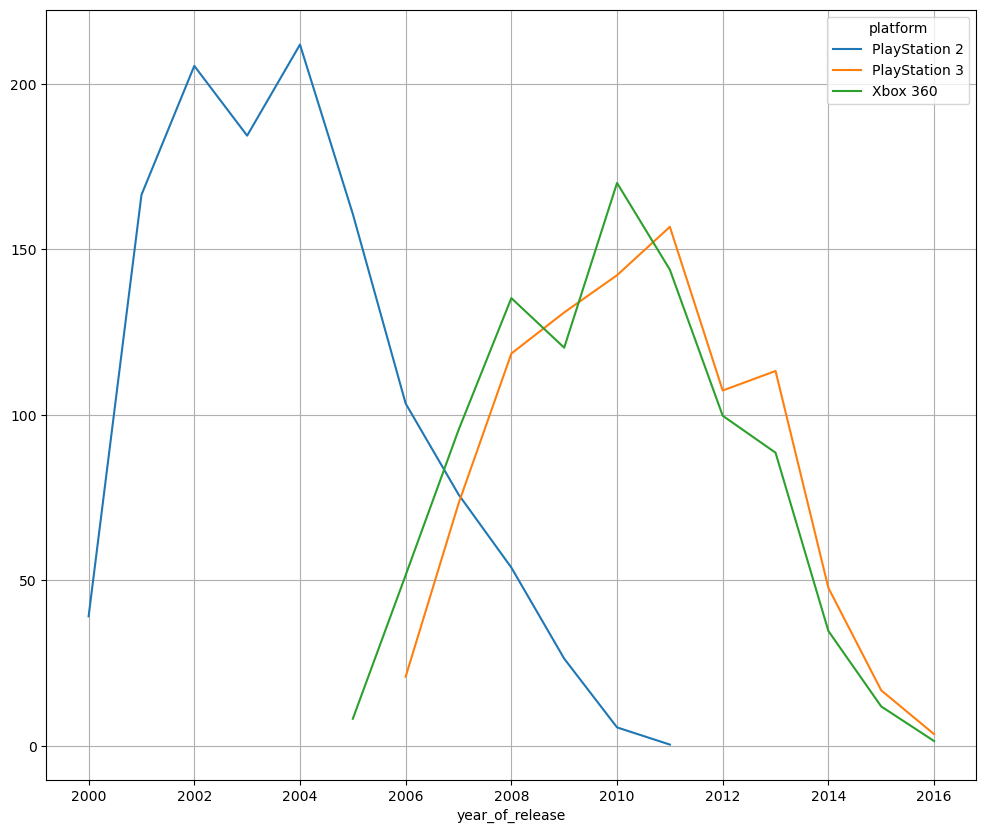

In [24]:
data_console = data.loc[(data['platform'] == "PlayStation 2") | (data['platform'] == "PlayStation 3") | (data['platform'] == "Xbox 360")]

data_console.pivot_table(index='year_of_release', columns = 'platform', values='sum_sales', aggfunc='sum').plot(grid=True, figsize=(12, 10))
plt.show()

С помощью графика мы можем определить жизненный цикл существования трех выбранных платформ:

- PlayStation 2 имеет жизненный цикл, равный 11 годам. Вероятно, выход третьей серии консолей PlayStation сказалось на популярность второй версии, поэтому к 2011 году объем продаж снизился до нуля.

- Xbox 360 имеет жизненный цикл, равный 11 годам. Объем продаж снизился до нуля к 2016 году.

- PlayStation 3 имеет жизненный цикл, равный 10 годам. Объем продаж стал близким к нулю в 2016 году.

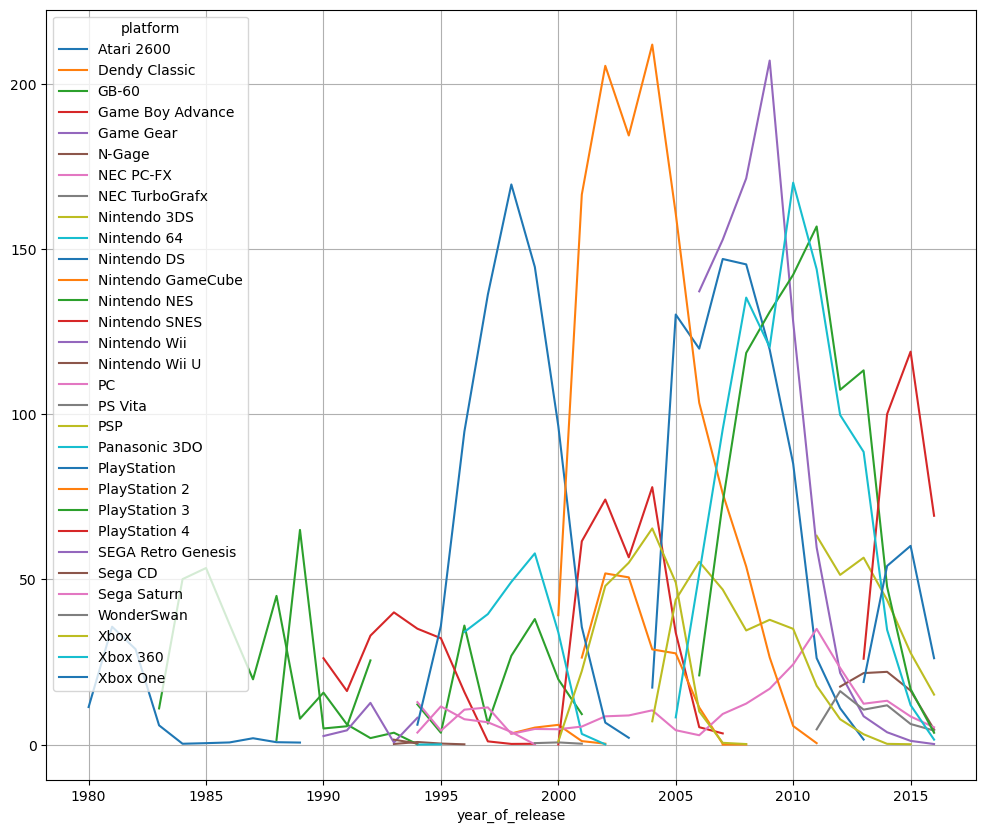

In [25]:
data.pivot_table(index='year_of_release', columns = 'platform', values='sum_sales', aggfunc='sum').plot(grid=True, figsize=(12, 10))
plt.show()

Наблюдение: 

По графику можно определить, что популярность одной игровой платформы длится в среднем от 7 до 10 лет. Новые платформы выпускают каждые 1-2 года. Лидеры по продажам среди платформ в среднем имеют жизненный цикл, равный 10-11 годам.

#### Исследование данных за актуальный период для дальнейшего прогноза на 2017 год:

Будем считать актуальными данными те, что содержат информацию о продажах за последние три года. Импортируем в новый датафрейм все данные об играх за 2014, 2015 и 2016 годы.

In [26]:
new_data = data.query("2014 <= year_of_release <= 2016") # создание новой таблица с данными за 2014, 2015 и 2016
new_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
31,Call of Duty: Black Ops 3,PlayStation 4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
42,Grand Theft Auto V,PlayStation 4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,Nintendo 3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
77,FIFA 16,PlayStation 4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PlayStation 4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PS Vita,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,Aiyoku no Eustia,PS Vita,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PlayStation 3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PS Vita,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


Составим график с суммой продаж для каждой платформы (по вертикали) и с годом выпуска игры (по горизонтали):

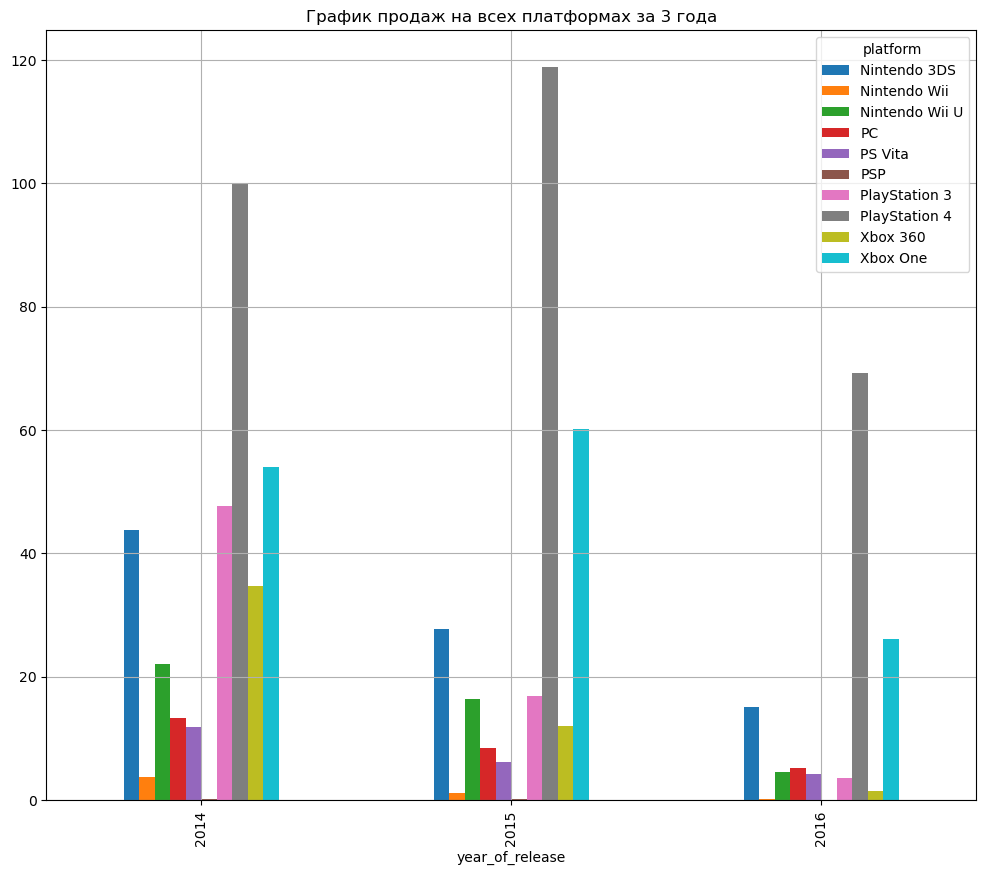

In [27]:
new_data.pivot_table(index='year_of_release', columns = 'platform', values='sum_sales', aggfunc='sum').plot(grid=True, figsize=(12, 10), kind='bar', title='График продаж на всех платформах за 3 года')
plt.show()

In [28]:
new_data.groupby(['platform', 'year_of_release'])['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'sum_sales'].sum().sort_values(by=['platform','year_of_release'])

na_sales  eu_sales  jp_sales  other_sales  \
platform       year_of_release                                              
Nintendo 3DS   2014                12.33      8.73     20.69         2.01   
               2015                 6.17      5.06     15.52         1.03   
               2016                 4.14      2.33      8.03         0.64   
Nintendo Wii   2014                 1.59      1.86      0.00         0.30   
               2015                 0.43      0.62      0.00         0.09   
               2016                 0.06      0.11      0.00         0.01   
Nintendo Wii U 2014                10.50      6.66      3.19         1.68   
               2015                 6.76      5.01      3.45         1.13   
               2016                 2.10      1.48      0.67         0.35   
PC             2014                 3.51      8.87      0.00         0.90   
               2015                 2.36      5.57      0.00         0.59   
               2016                 1.36      3.53      0.00         0.36   
PS Vita        2014                 1.98      2.45      6.13         1.34   
               2015                 0.39      0.69      4.85         0.32   
               2016                 0.15      0.39      3.56         0.15   
PSP            2014                 0.00      0.00      0.24         0.00   
               2015                 0.00      0.00      0.12         0.00   
PlayStation 3  2014                16.39     18.24      6.25         6.88   
               2015                 4.99      6.04      3.67         2.12   
               2016                 0.67      1.26      1.30         0.37   
PlayStation 4  2014                34.75     46.50      2.97        15.78   
               2015                42.37     51.76      6.31        18.46   
               2016                21.49     31.78      5.74        10.24   
Xbox 360       2014                20.25     11.28      0.08         3.13   
               2015                 7.36      3.50      0.00         1.10   
               2016                 0.69      0.71      0.00         0.12   
Xbox One       2014                30.97     18.15      0.14         4.81   
               2015                36.03     18.47      0.17         5.47   
               2016                14.27      9.63      0.01         2.24   

                                sum_sales  
platform       year_of_release             
Nintendo 3DS   2014                 43.76  
               2015                 27.78  
               2016                 15.14  
Nintendo Wii   2014                  3.75  
               2015                  1.14  
               2016                  0.18  
Nintendo Wii U 2014                 22.03  
               2015                 16.35  
               2016                  4.60  
PC             2014                 13.28  
               2015                  8.52  
               2016                  5.25  
PS Vita        2014                 11.90  
               2015                  6.25  
               2016                  4.25  
PSP            2014                  0.24  
               2015                  0.12  
PlayStation 3  2014                 47.76  
               2015                 16.82  
               2016                  3.60  
PlayStation 4  2014                100.00  
               2015                118.90  
               2016                 69.25  
Xbox 360       2014                 34.74  
               2015                 11.96  
               2016                  1.52  
Xbox One       2014                 54.07  
               2015                 60.14  
               2016                 26.15

In [29]:
new_data.groupby(['platform'])['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'sum_sales'].sum().sort_values(by='sum_sales', ascending=False)

,na_sales,eu_sales,jp_sales,other_sales,sum_sales
platform,,,,,
PlayStation 4,98.61,130.04,15.02,44.48,288.15
Xbox One,81.27,46.25,0.32,12.52,140.36
Nintendo 3DS,22.64,16.12,44.24,3.68,86.68
PlayStation 3,22.05,25.54,11.22,9.37,68.18
Xbox 360,28.30,15.49,0.08,4.35,48.22
Nintendo Wii U,19.36,13.15,7.31,3.16,42.98
PC,7.23,17.97,0.00,1.85,27.05
PS Vita,2.52,3.53,14.54,1.81,22.40
Nintendo Wii,2.08,2.59,0.00,0.40,5.07


Наблюдение:

Больше всего продаж игр было для платформы PlayStation 4 и Xbox One. Они являются современными и самыми популярными игровыми платформами в эти годы. Для других платформ количество продаж стремится к нулю. Заметен спад продаж в 2016 году.

Наиболее прибыльными платформами являются три платформы:
1. PlayStation 4
2. Xbox One
3. Nintendo 3DS

На графике также заметен рост объема продаж для консолей PlayStation 4 и Xbox One в период с 2014 по 2015. В 2016 году эти две платформы тоже являются лидерами продаж, поэтому их можно называть потенциально прибыльными. 

Объем продаж игр для Nintendo 3DS уменьшается с 2014 по 2015 год, с 2015 по 2016 год тоже заметен спад, поэтому вероятнее всего, что объем продаж в 2017 году будет снижаться и дальше. Для будущей рекламной кампании для платформы Nintendo 3DS есть риск того, что она не окупится, так как интерес пользователей довольно низкий на 2016 год.

#### Статистика общего количество продаж для каждой платформы:

Необходимо построить "ящик с усами", чтобы оценить сумму всех продаж игр для каждой платформы.

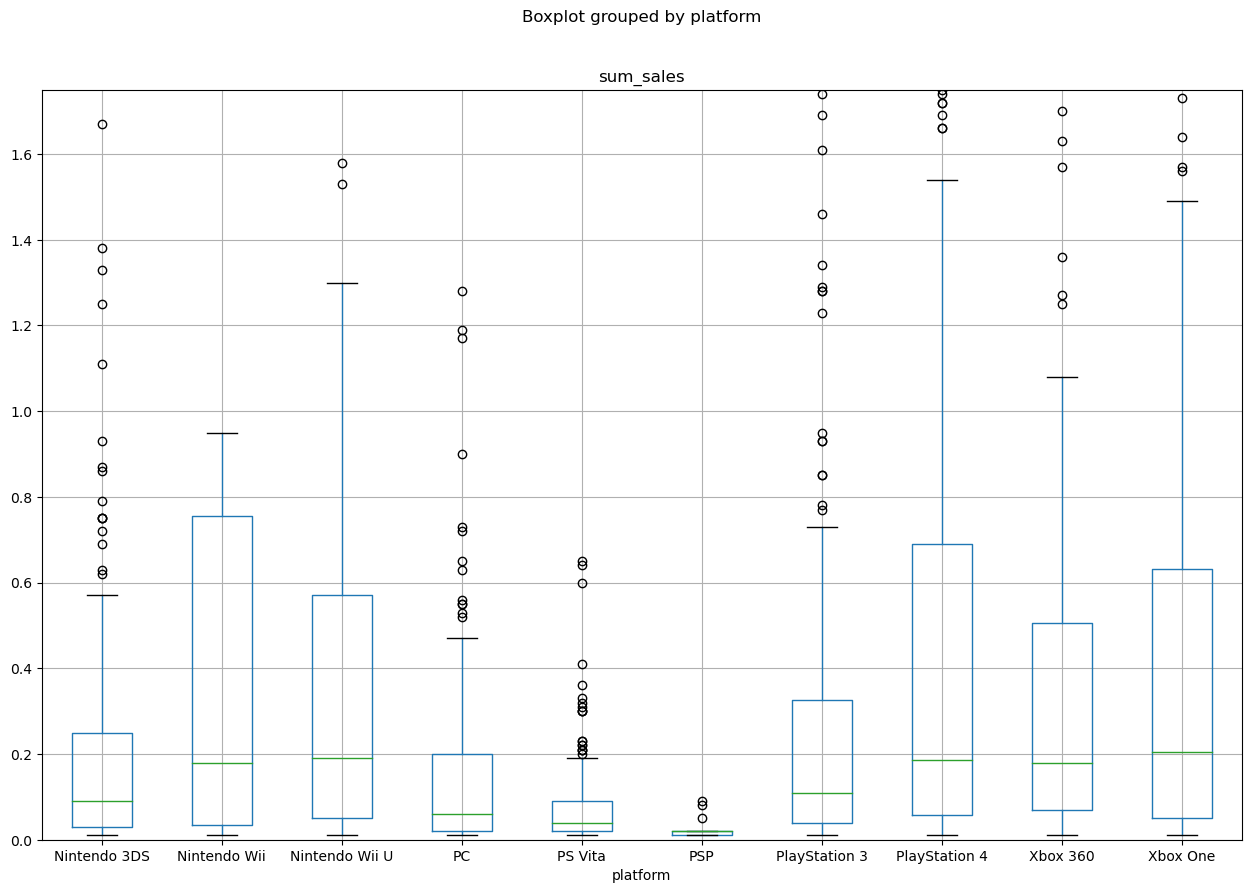

In [30]:
new_data.boxplot(column='sum_sales', by='platform', figsize=(15, 10))
plt.ylim(0,1.75)
plt.show()

На основе данных, полученных с помощью диаграммы размаха, можно сделать несколько выводов:

1. Показатель медианы для платформы PlayStation 4 меньше, чем показатель медианы для платформ Xbox One и Nintendo Wii U. 
2. По графику видно, что первая половина выборки для PlayStation 4 не превосходит по показателем ряд платформ, однако во второй половине выборки заметны большие объемы продаж. 
3. Объем продаж 75% выборки для PlayStation 4 уступает только объему продаж игр для платформы Nintendo Wii, однако последние 25% выборки для платформы PlayStation 4 имеют рекордные показатели по объему продаж среди всех платформ, поэтому эта платформа является лидером рынка.
4. PlayStation 4 лидирует по объему продаж за счет большего количества игр, которые получили народное признание (высокий интерес со стороны пользователей). 

#### Зависимость продаж игр от оценок пользователей и критиков в рамках выбранной платформы:

Найдем зависимость того, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Возьмем данные об отзывах пользователей для платформы PlayStation 4.

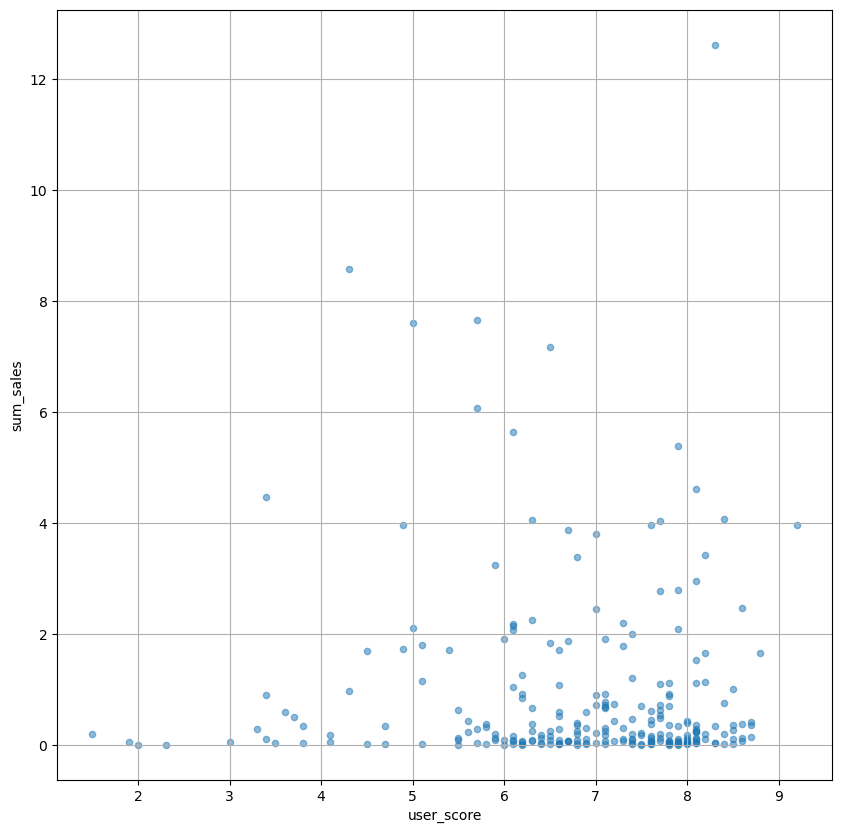

In [31]:
new_data[new_data['platform'] == 'PlayStation 4'].plot(x='user_score', y='sum_sales', alpha=0.5, figsize=(10,10), grid=True, kind='scatter')
plt.show()

Найдем коэффициент корреляции Пирсона для нахождения зависимости суммарных продаж от оценок пользователей:

In [32]:
new_data_of_PS4 = new_data[new_data['platform'] == 'PlayStation 4']
new_data_of_PS4['sum_sales'].corr(new_data_of_PS4['user_score'])

-0.040131589472697335

Наблюдение:

Коэффициент корреляции близок к нулю, значит зависимости между объемом продаж игр и оценками пользователей нет. На основе результатов, полученных с помощью диаграммы рассеяния, можно сделать вывод, что существуют игры, которые имеют высокий показатель продаж, однако имеют относительно низкие оценки со стороны пользователей.

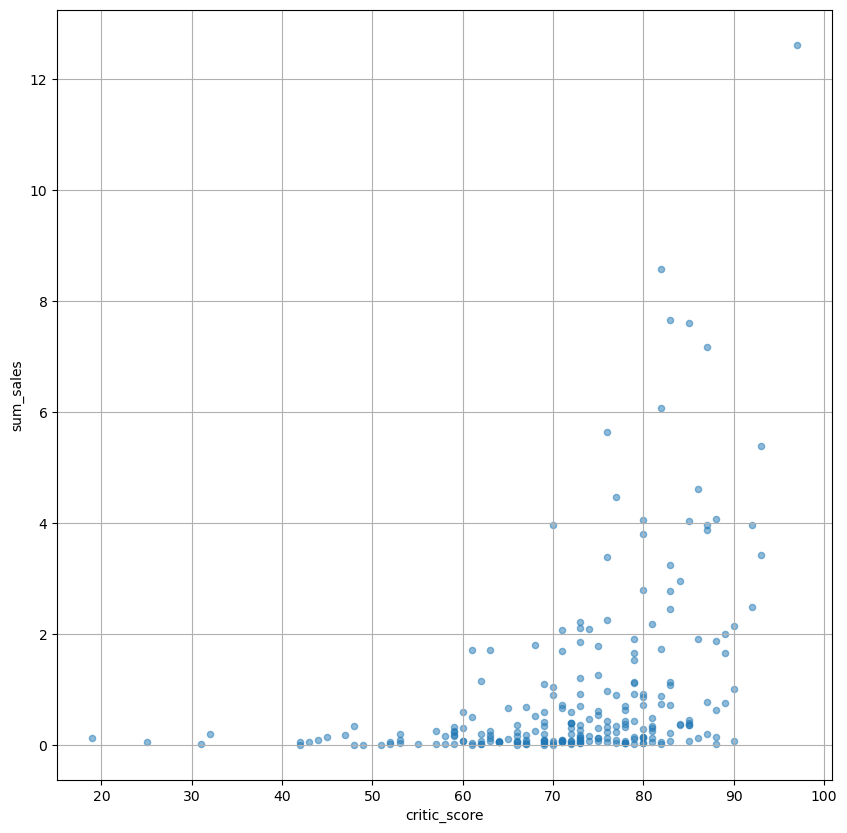

In [33]:
new_data[new_data['platform'] == 'PlayStation 4'].plot(x='critic_score', y='sum_sales', alpha=0.5, figsize=(10,10), grid=True, kind='scatter')
plt.show()

In [34]:
new_data_of_PS4['sum_sales'].corr(new_data_of_PS4['critic_score'])

0.4026614106810408

Наблюдение:

По диаграмме рассеяния и коэффициенту корреляции Пирсона можно отметить, что зависимость несущественная, однако есть категория людей, которая ориентируется на оценки критиков перед покупкой игры. С помощью двух графиков можно определить, что большинство выпущенных игр имеет положительную оценку как со стороны критиков, так и со стороны пользователей.

Найдем зависимость продаж игр от оценок пользователей и критиков для других платформ:

In [35]:
new_data.groupby('platform')['sum_sales'].corr(new_data['user_score'])

platform
Nintendo 3DS      0.215193
Nintendo Wii      1.000000
Nintendo Wii U    0.407926
PC               -0.071597
PS Vita          -0.168455
PSP                    NaN
PlayStation 3    -0.166761
PlayStation 4    -0.040132
Xbox 360         -0.138445
Xbox One         -0.070384
Name: sum_sales, dtype: float64

После получения коэффициента корреляции Пирсона для каждой платформы мы можем отметить, что продажи игр не зависят от оценки пользователей. Для платформы Nintendo Wii наблюдается прямая зависимость объема продаж от оценки пользователей.

Проверим это значение:

In [36]:
data[data['platform'] == 'Nintendo Wii'].count()

name               1286
platform           1286
year_of_release    1286
genre              1286
na_sales           1286
eu_sales           1286
jp_sales           1286
other_sales        1286
critic_score        568
user_score          548
rating              977
sum_sales          1286
dtype: int64

Можно заметить, что данные в столбце ```user_score``` составляют менее 50% от общего количества данных. Вероятно, из-за этого коэффициент получился однозначным.

Найдем зависимость объема продаж игр от оценок критиков:

In [37]:
new_data.groupby('platform')['sum_sales'].corr(new_data['critic_score'])

platform
Nintendo 3DS      0.314117
Nintendo Wii           NaN
Nintendo Wii U    0.370201
PC                0.174634
PS Vita           0.042665
PSP                    NaN
PlayStation 3     0.446575
PlayStation 4     0.402661
Xbox 360          0.525723
Xbox One          0.428677
Name: sum_sales, dtype: float64

На основе полученных данных можно утверждать, что существуют платформы, продажи которых могут зависеть от оценки критиков, однако прямой зависимости мы наблюдать не можем.

#### Распределение игр по жанрам:

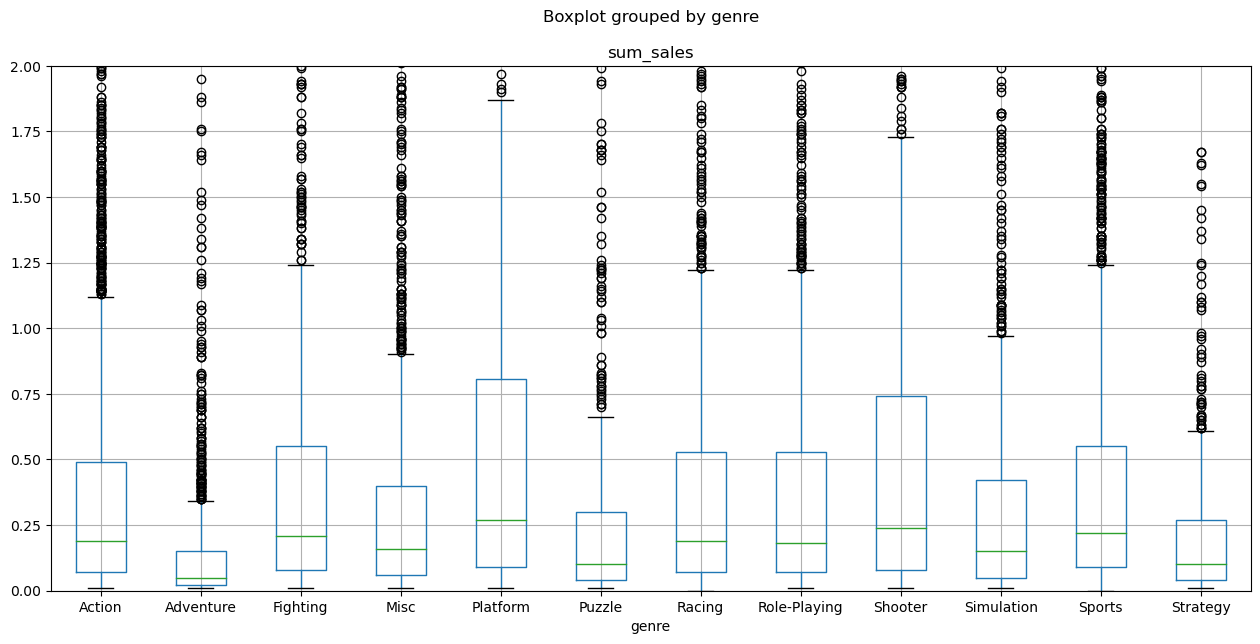

In [38]:
(
    data
    .boxplot(column='sum_sales', by='genre', figsize=(15,7))
)
plt.ylim(0, 2)
plt.show()

Наблюдение: 

С помощью диаграммы можно выявить, какие жанры являются популярными среди пользователей, а какие и вовсе не вызывают интерес.

Самые популярные жанры: 
- Platform
- Shooter
- Sports
- Fighting

Самые непопулярные жанры:
- Adventure
- Puzzle
- Strategy
- Simulation

Проверим интерес игроков к каждому жанру в период с 2015 до 2016 года:

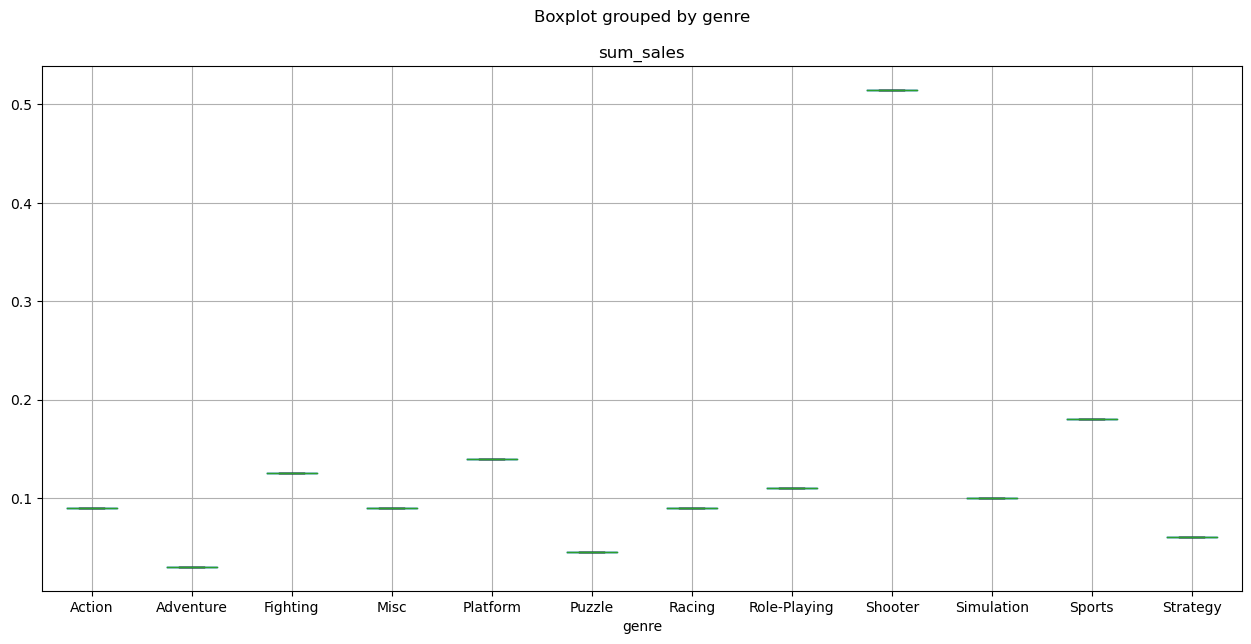

In [39]:
(
    new_data.pivot_table(index='genre', values='sum_sales', aggfunc='median')
    .boxplot(column='sum_sales', by='genre', figsize=(15,7))
)
plt.show()

Можно отметить следующие выводы:
1. Самым популярным жанром стал Shooter
2. Жанр Role-Playing практически не уступает жанру Sports, однако по данным за все годы он существенно отставал.
3. Жанр Platform стал менее популярен за несколько лет.
4. Жанр Simulation из аутсайдеров выбился в топ 3 жанров по популярности.

#### Вывод:

На этом этапе было проведено исследование. Было выявлено количество продаваемых игр за каждый год. С помощью данных определен приблизительный срок перехода со старых игровых платформ на новые. Была собрана статистика общих продаж игр для каждой платформы. Помимо этого, были исследованы актуальные данные за последние 2 года, была отслежена зависимость продаж игр от оценок пользователей и критиков в рамках выбранной игровой платформы.

По данным за 2015 и 2016 было определено, что самыми прибыльными платформами являются PlayStation 4, Xbox One и Nintendo 3DS. Этот результат очень важен для работы, так как он позволит правильно выбрать потенциально популярный продукт и спланировать рекламные кампании.

### Составление портрета пользователя каждого региона

Для того, чтобы составить актуальный портрет пользователя в каждом регионе, необходимо проводить вычисления на основе данных за 2015 и 2016 год. Для этого будем использовать датафрейм ```new_data```, который создали ранее.

Работа на этом этапе состоит из пяти пунктов:

- Составление портрета пользователя из Северной Америки.
- Составление портрета пользователя из Европы.
- Составление портрета пользователя из Японии.
- Составление портрета пользователя из других регионов.
- Проверим, влияет ли рейтинг ESRB на продажи игр в регионах.

#### Составление портрета пользователя из Северной Америке: 

Топ 5 популярных платформ среди пользователей из Северной Америки:

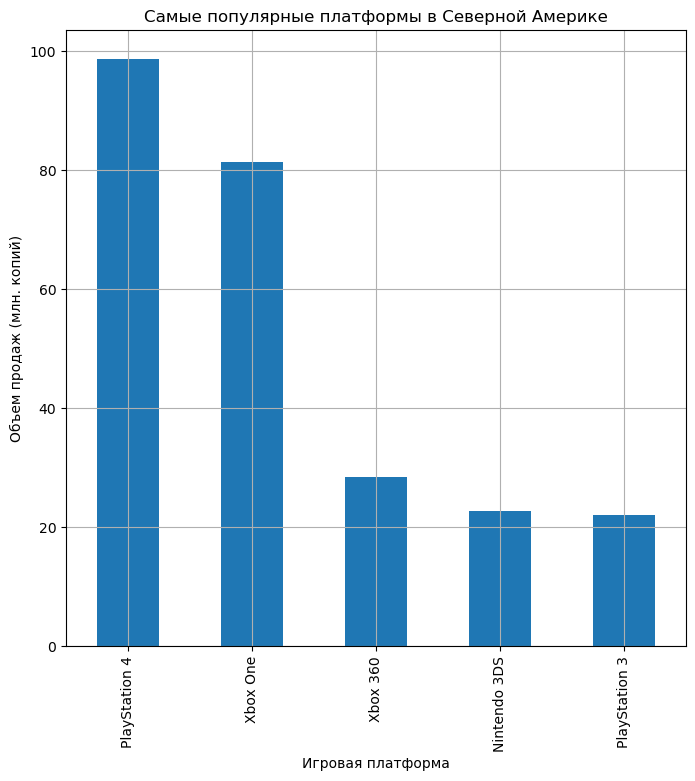

In [40]:
new_data.groupby('platform')['na_sales'].sum().sort_values(ascending=False)[:5].plot(kind='bar', grid=True, title='Самые популярные платформы в Северной Америке', figsize=(8,8))
plt.xlabel('Игровая платформа')
plt.ylabel('Объем продаж (млн. копий)')
plt.show()

Топ 5 популярных игровых жанров среди пользователей из Северной Америки:

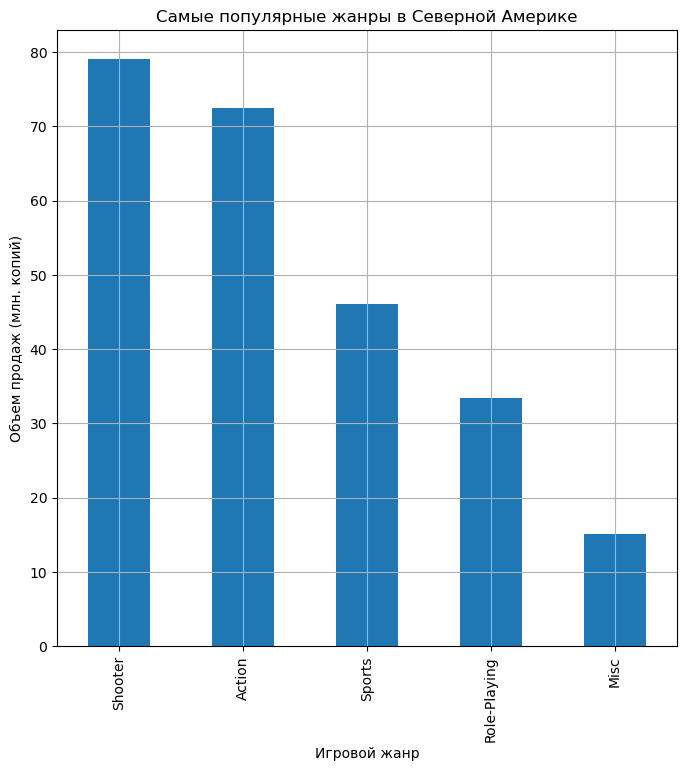

In [41]:
new_data.groupby('genre')['na_sales'].sum().sort_values(ascending=False)[:5].plot(kind='bar', grid=True, title='Самые популярные жанры в Северной Америке', figsize=(8,8))
plt.xlabel('Игровой жанр')
plt.ylabel('Объем продаж (млн. копий)')
plt.show()

В Северной Америке пользователи отдают своё предпочтение следующим платформам:

- PlayStation 4
- Xbox One
- Nintendo 3DS
- Nintendo Wii U
- Xbox 360

Самыми популярными жанрами являются Shooter, Action, Sports, Role-Playing и Misc.

#### Составление портрета пользователя из Европы: 

Топ 5 популярных платформ среди пользователей из Европы:

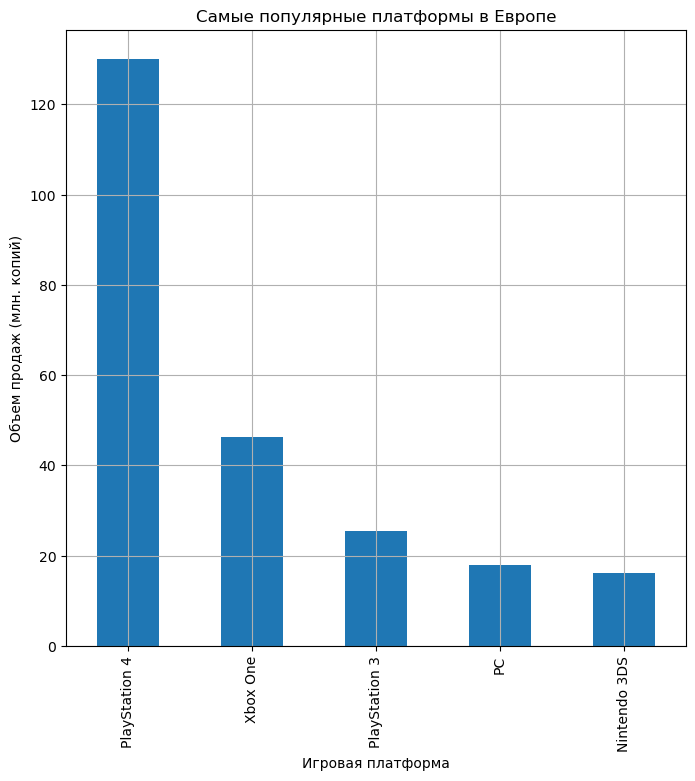

In [42]:
new_data.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)[:5].plot(kind='bar', grid=True, title='Самые популярные платформы в Европе', figsize=(8,8))
plt.xlabel('Игровая платформа')
plt.ylabel('Объем продаж (млн. копий)')
plt.show()

Топ 5 популярных игровых жанров среди пользователей из Европы:

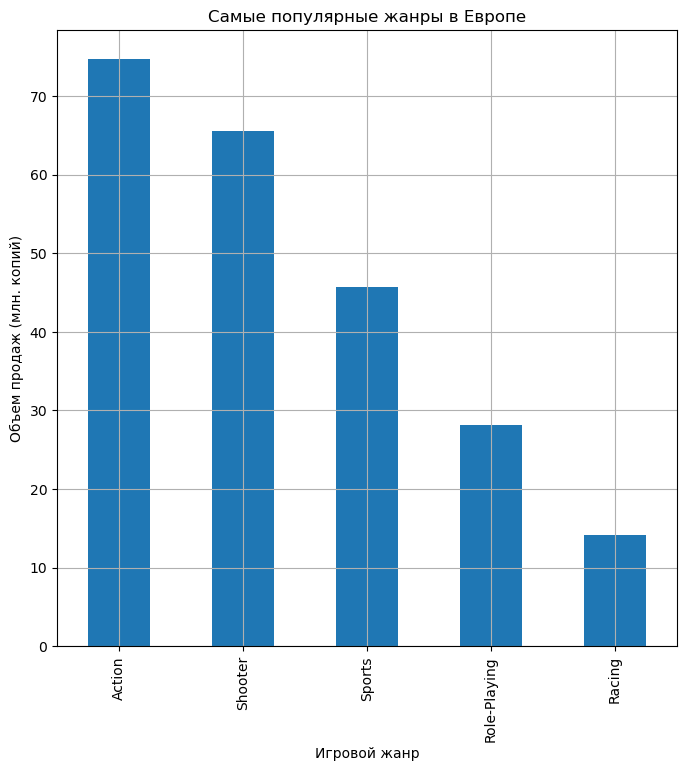

In [43]:
new_data.groupby('genre')['eu_sales'].sum().sort_values(ascending=False)[:5].plot(kind='bar', grid=True, title='Самые популярные жанры в Европе', figsize=(8,8))
plt.xlabel('Игровой жанр')
plt.ylabel('Объем продаж (млн. копий)')
plt.show()

Самыми популярными платформами в Европе являются PlayStation 4, Xbox One, PC, Nintendo 3DS и PlayStation 3, а самые популярные жанры у пользователей - Shooter, Action, Sports, Role-Playing и Racing.

#### Составление портрета пользователя из Японии: 

Топ 5 популярных платформ среди пользователей из Японии:

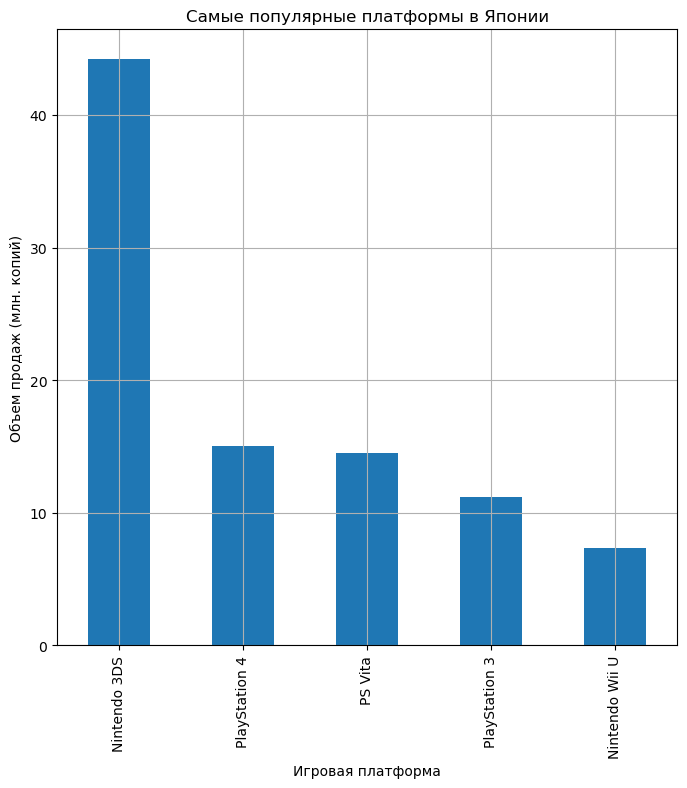

In [44]:
new_data.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)[:5].plot(kind='bar', grid=True, title='Самые популярные платформы в Японии', figsize=(8,8))
plt.xlabel('Игровая платформа')
plt.ylabel('Объем продаж (млн. копий)')
plt.show()

Топ 5 популярных игровых жанров среди пользователей из Японии:

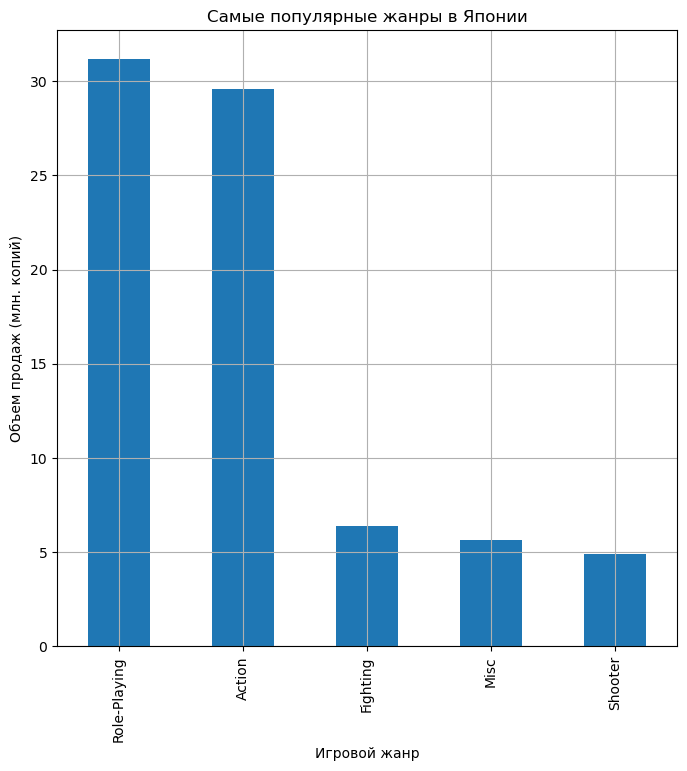

In [45]:
new_data.groupby('genre')['jp_sales'].sum().sort_values(ascending=False)[:5].plot(kind='bar', grid=True, title='Самые популярные жанры в Японии', figsize=(8,8))
plt.xlabel('Игровой жанр')
plt.ylabel('Объем продаж (млн. копий)')
plt.show()

Для пользователей из Японии самыми популярными игровыми платформами являются Nintendo 3DS, PlayStation 4, PS Vita, Playstation 3 и Nintendo Wii U.
Самыми популярными жанрами являются Action, Role-Playing, Shooter, Misc и Adventure.

#### Составление портрета пользователя из других регионов: 

Топ 5 популярных платформ среди пользователей из других регионов:

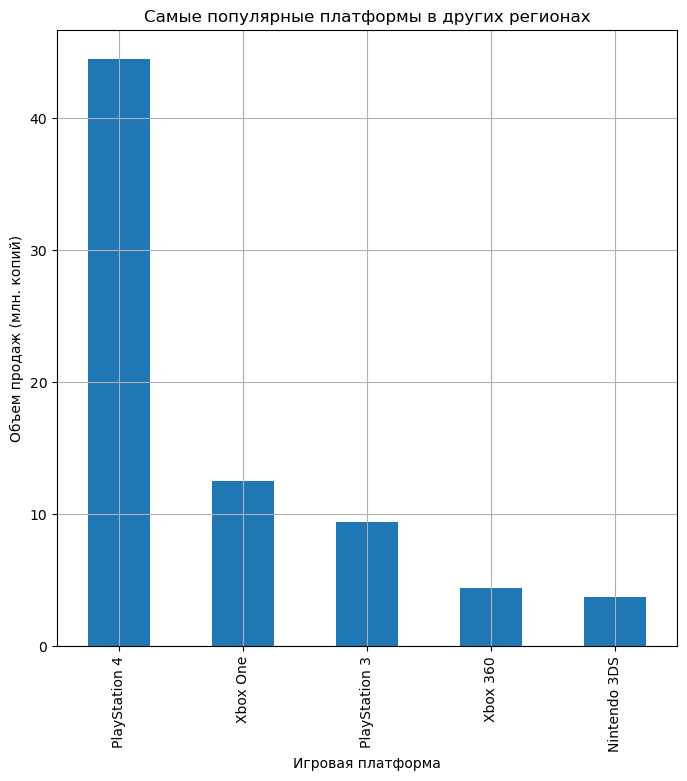

In [46]:
new_data.groupby('platform')['other_sales'].sum().sort_values(ascending=False)[:5].plot(kind='bar', grid=True, title='Самые популярные платформы в других регионах', figsize=(8,8))
plt.xlabel('Игровая платформа')
plt.ylabel('Объем продаж (млн. копий)')
plt.show()

Топ 5 популярных игровых жанров среди пользователей из других регионов:

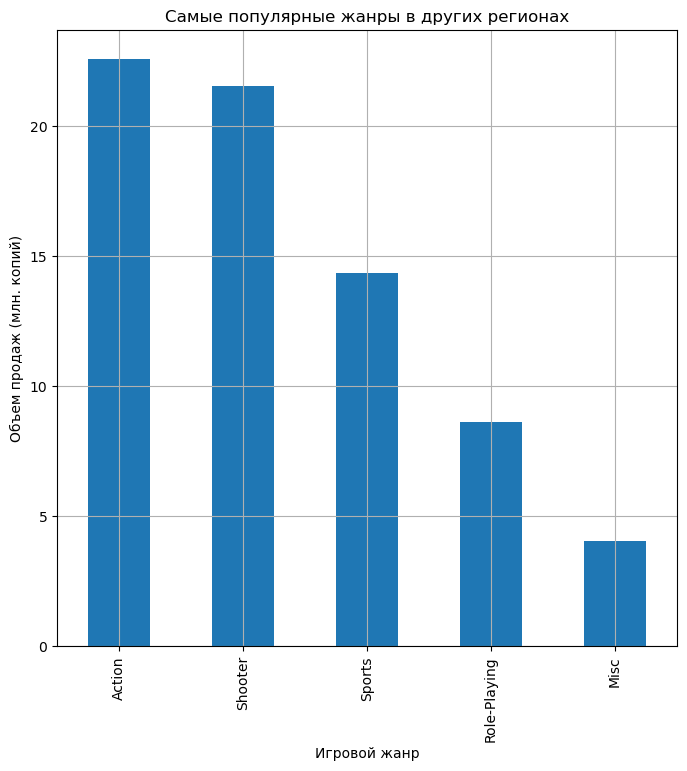

In [47]:
new_data.groupby('genre')['other_sales'].sum().sort_values(ascending=False)[:5].plot(kind='bar', grid=True, title='Самые популярные жанры в других регионах', figsize=(8,8))
plt.xlabel('Игровой жанр')
plt.ylabel('Объем продаж (млн. копий)')
plt.show()

Самыми популярными жанрами для пользователей из других регионов являются PlayStation 4, Xbox One, PlayStation 3, Nintendo 3DS и Nintendo Wii U.

Самые популярные жанры для пользователей из других регионов:
- Shooter
- Action
- Sports
- Role-Playing
- Fighting

#### Влияние рейтинга ESRB на продажи игр в регионах: 

В столбце ```rating``` находится большое количество пропусков в данных, поэтому необходимо заменить их на выбранное заранее название:

In [48]:
new_data['rating'] = new_data['rating'].fillna('Неизвестен')

Выявление зависимости объема продаж игр от рейтинга ESRB в Северной Америке:

rating
M             96.42
Неизвестен    64.72
E             50.74
T             38.95
E10+          33.23
Name: na_sales, dtype: float64


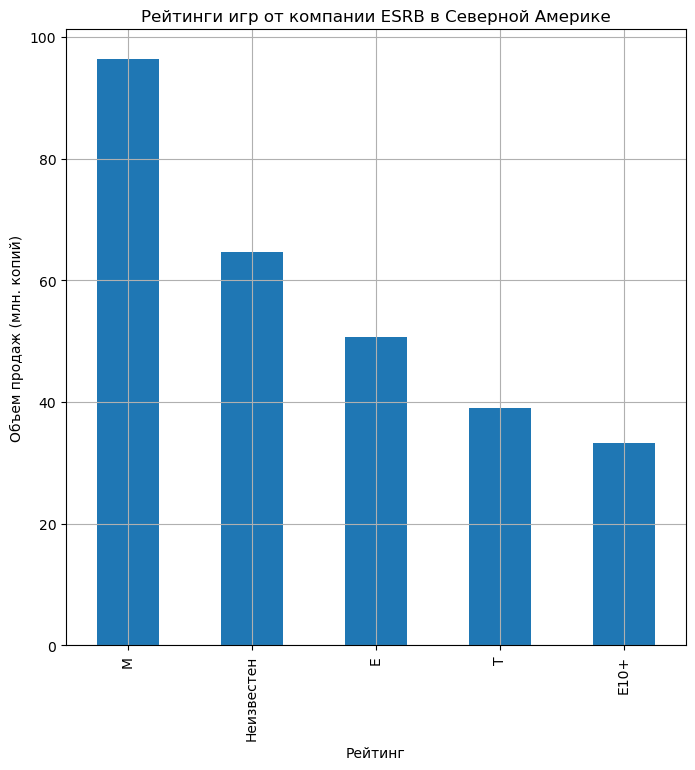

In [49]:
print(new_data.groupby('rating')['na_sales'].sum().sort_values(ascending=False))

# Построение столбчатого графика
new_data.groupby('rating')['na_sales'].sum().sort_values(ascending=False).plot(kind='bar', grid=True, title='Рейтинги игр от компании ESRB в Северной Америке', figsize=(8,8))
plt.xlabel('Рейтинг')
plt.ylabel('Объем продаж (млн. копий)')
plt.show()

В Северной Америке самые большие объемы продаж у игр с рейтингом M (Mature 17+: возрастная категория для лиц, которым уже исполнилось 17 и более лет).
Меньше всего копий игр было продано с рейтингом E10+ (Everyone 10+: возрастная категория для всех лиц, которым исполнилось 10 и более лет).

Выявление зависимости объема продаж игр от рейтинга ESRB в Европе:

rating
M             93.44
Неизвестен    58.95
E             58.06
T             34.07
E10+          26.16
Name: eu_sales, dtype: float64


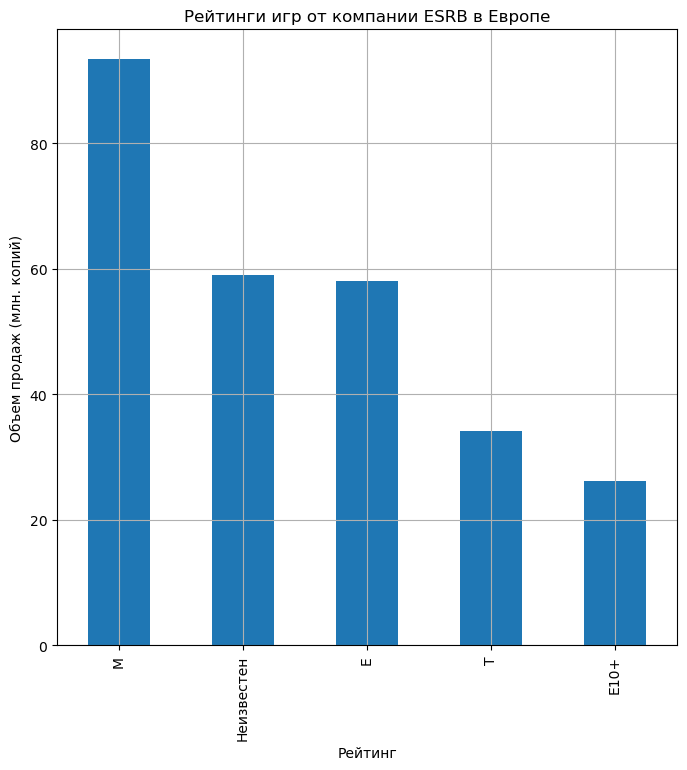

In [50]:
print(new_data.groupby('rating')['eu_sales'].sum().sort_values(ascending=False))

new_data.groupby('rating')['eu_sales'].sum().sort_values(ascending=False).plot(kind='bar', grid=True, title='Рейтинги игр от компании ESRB в Европе', figsize=(8,8))

plt.xlabel('Рейтинг')
plt.ylabel('Объем продаж (млн. копий)')
plt.show()

В Европе ситуация аналогична той, что мы рассмотрели в Северной Америке. Лидером продаж среди игр являются те, которым был присвоен рейтинг M (Mature 17+). Копий игр с категорией E10+ (Everyone 10+) было продано меньше всего.

Выявление зависимости объема продаж игр от рейтинга ESRB в Японии:

rating
Неизвестен    56.90
T             14.78
E              8.94
M              8.01
E10+           4.46
Name: jp_sales, dtype: float64


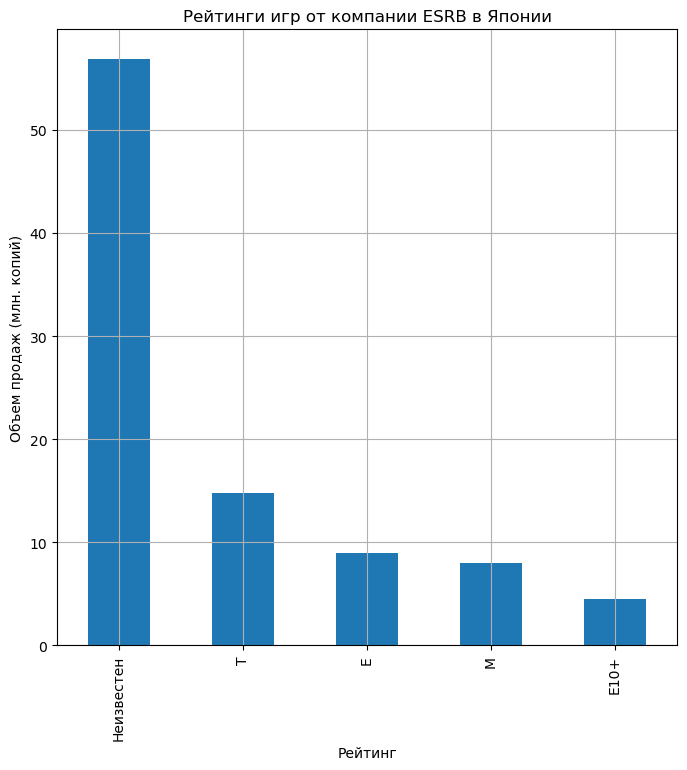

In [51]:
print(new_data.groupby('rating')['jp_sales'].sum().sort_values(ascending=False))

new_data.groupby('rating')['jp_sales'].sum().sort_values(ascending=False).plot(kind='bar', grid=True, title='Рейтинги игр от компании ESRB в Японии', figsize=(8,8))
plt.xlabel('Рейтинг')
plt.ylabel('Объем продаж (млн. копий)')
plt.show()

По графику видно, что в Японии объем продаж значительно меньше, чем в Северной Америке и Европе. Также следует заметить, что лидером продаж являются игры с неопределенной категорией. Объем копий игр с рейтингом M (Mature 17+) находится предпоследним в нашем списке, а эту четверку замыкают продажи игр с категорией E10+ (Everyone 10+).

Можно предположить, что в данном регионе рейтинг ESRB может влиять на объем продаж, однако следует учитывать интересы населения Японии, их свободное время и запреты в области гейминга. Важно знать причину, по которой могли возникнуть пропуски в данных про рейтинг игр.

Выявление зависимости объема продаж игр от рейтинга ESRB в других регионах:

rating
M             28.67
Неизвестен    18.40
E             15.39
T             11.33
E10+           7.83
Name: other_sales, dtype: float64


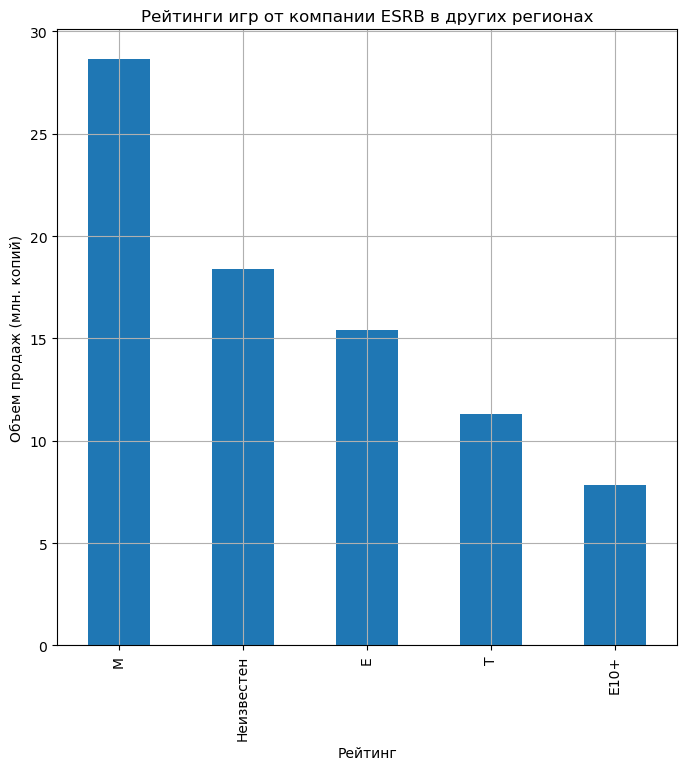

In [52]:
print(new_data.groupby('rating')['other_sales'].sum().sort_values(ascending=False))

new_data.groupby('rating')['other_sales'].sum().sort_values(ascending=False).plot(kind='bar', grid=True, title='Рейтинги игр от компании ESRB в других регионах', figsize=(8,8))
plt.xlabel('Рейтинг')
plt.ylabel('Объем продаж (млн. копий)')
plt.show()

Для других регионов статистика схожа с Северной Америкой и Европой. Здесь преобладают игры с категорией M и не преобладают игры с категорией E10+.

#### Вывод:

Для того, чтобы удачно спланировать рекламные кампании, нужно знать, какие платформы и жанры в конкретных странах являются самыми прибыльными и популярными. По данным, полученным из исследования, можно подвести итог:

Самая популярная платформа:
- В Северной Америке - PlayStation 4
- В Европе - PlayStation 4
- В Японии - Nintendo 3DS
- В других регионах - PlayStation 4

Самый популярный жанр:
- В Северной Америке - Shooter
- В Европе - Shooter
- В Японии - Action
- В других регионах - Shooter

Как мы можем заметить, что во всех регионах, кроме Японии, пользователи отдают свое предпочтение платформе PlayStation 4, а самым популярным для них жанром является Shooter.

### Проверка гипотез

На этапе этапе необходимо проверить две гипотезы:
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
2. Средние пользовательские рейтинги жанров Action и Sports разные.

#### Первая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

In [53]:
xbox = new_data[new_data['platform'] == 'Xbox One']['user_score']
pc = new_data[new_data['platform'] == 'PC']['user_score']

alpha = 0.05

results = st.ttest_ind(xbox, pc, equal_var=False, nan_policy='omit')
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.11601398086668943
Не получилось отвергнуть нулевую гипотезу


Нулевая гипотеза была сформулирована так: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Альтернативная гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC разные.

После нахождения p-значения мы можем сделать вывод, что нам не следует отвергать нулевую гипотезу.

#### Вторая гипотеза: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

In [54]:
action = new_data[new_data['genre'] == 'Action']['user_score']
sports = new_data[new_data['genre'] == 'Sports']['user_score']

alpha = 0.05

results = st.ttest_ind(action, sports, equal_var=False, nan_policy='omit')
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 1.182555038264477e-14
Отвергаем нулевую гипотезу


Нулевая гипотеза: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые.

Альтернативная гипотеза: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

С помощью нахождения p-значения мы выяснили, что нам следует отвергнуть нулевую гипотезу.

#### Вывод:

Для проверки гипотез был взят критический уровень статистической значимости. Он был задан вручную. Исторически сложилось так, что в психологии принято считать низшим уровнем статистической значимости 5%-ый уровень, поэтому в переменную alpha было присвоено значение 0.05.

На основе полученных результатов исследования, можно сделать следующие выводы по двум гипотезам:

1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. p-значение больше чем уровень статистической значимости, поэтому нам не следует отвергать нулевую гипотезу.
2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные. p-значение много меньше, чем уровень статистической значимости, поэтому нам следует отвергнуть нулевую гипотезу.

### Общий вывод

В работе были изучены исходные исторические данные из открытых источников о продажах игр, оценки пользователей и экспертов, жанры и платформы. Данные были очищены от пропусков там, где это возможно было сделать. Была выявлена закономерность, влияющая на успешность игры. Было проведено исследование, результаты которого помогут нам сделать вывод о потенциально прибыльных продуктах, для которых можно планировать рекламные кампании на 2017 год.

В исследовании были проверены две гипотезы. Итог можно сформулировать таким образом: 
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

В конце каждого этапа написаны выводы, с которыми можно ознакомиться.

Важные результаты, на основе которых можно спланировать рекламные кампании на 2017 год:

- Самой популярной платформой с 2014 по 2016 является PlayStation 4. В Японии самая популярная платформа для гейминга - Nintendo 3DS, однако не стоит ориентироваться на этот рынок в качестве основного, так как объем продаж копий игр значительно меньше, чем в Северной Америке и Европе.
- Самый популярный жанр во всех регионах - Shooter, однако в Японии пользователи отдают свое предпочтение жанру Action.

Рекомендации:

Для того, чтобы правильно выбрать потенциально популярный продукт и спланировать рекламные кампании, важно учитывать, чтобы платформа и жанр являлись лидерами по объему продаж.

Для наибольшей прибыли необходимо сфокусироваться на рынках всех регионов, кроме Японии, так как они имеют одни и те же платформы и жанры в списке лидеров по объему продаж.

Лидеры объема продаж игр во всех регионах, кроме Японии:
- Для платформ - PlayStation 4 и Xbox One
- Для игровых жанров - Shooter и Action

Мы можем спланировать рекламную кампанию в Японии, но мы не можем гарантировать ее окупаемость. Для того, чтобы максимизировать прибыль, необходимо учитывать интересы японских пользователей.

Лидер объема продаж игр в Японии:
- Для платформ - Nintendo 3DS
- Для игровых жанров - Role-Playing и Action